In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import json
import os
from PIL import ImageDraw
from datetime import datetime as dt
import gc
import collections

from IPython.display import FileLink

In [2]:
with open('/home/ubuntu/iwildcam2020_megadetector_results.json', encoding='utf-8') as json_file:
    megadetector_results =json.load(json_file)
    
megadetector_results.keys()

dict_keys(['info', 'images', 'detection_categories'])

In [3]:
megadetector_results_df = pd.DataFrame(megadetector_results["images"])
megadetector_results_df.head()

,detections,id,max_detection_conf
0,"[{'category': '1', 'bbox': [0.6529, 0.5425, 0....",905a3c8c-21bc-11ea-a13a-137349068a90,0.999
1,"[{'category': '1', 'bbox': [0.0147, 0.0, 0.985...",905a3fc0-21bc-11ea-a13a-137349068a90,0.696
2,[],905a420e-21bc-11ea-a13a-137349068a90,0.000
3,"[{'category': '1', 'bbox': [0.0, 0.4669, 0.185...",905a4416-21bc-11ea-a13a-137349068a90,1.000
4,"[{'category': '1', 'bbox': [0.0, 0.0494, 0.528...",905a579e-21bc-11ea-a13a-137349068a90,0.999


In [4]:
def draw_bboxs(detections_list, im):
    """
    detections_list: list of set includes bbox.
    im: image read by Pillow.
    """
    
    for detection in detections_list:
        x1, y1,w_box, h_box = detection["bbox"]
        ymin,xmin,ymax, xmax=y1, x1, y1 + h_box, x1 + w_box
        draw = ImageDraw.Draw(im)
        
        imageWidth=im.size[0]
        imageHeight= im.size[1]
        (left, right, top, bottom) = (xmin * imageWidth, xmax * imageWidth,
                                      ymin * imageHeight, ymax * imageHeight)
        
        draw.line([(left, top), (left, bottom), (right, bottom),
               (right, top), (left, top)], width=4, fill='Red')

In [5]:
data_num = 8857
im = Image.open("/home/ubuntu/train/" + megadetector_results_df.loc[data_num]['id'] + ".jpg")
im = im.resize((480,270))
draw_bboxs(megadetector_results_df.loc[data_num]['detections'], im)

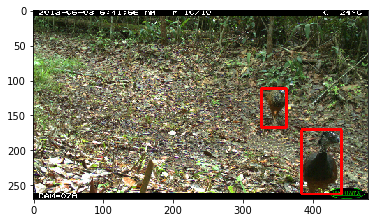

In [6]:
plt.imshow(im)

In [7]:
def get_data(x):
    if x == []:
        return 0
    return len(x)

megadetector_results_df["detected_num"] = megadetector_results_df.loc[:, "detections"].map(get_data)

Text(0.5, 1.0, 'distribution of count per animals each data of train')

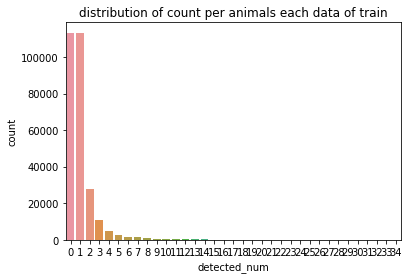

In [8]:
ax = sns.countplot(x="detected_num", data=megadetector_results_df)
ax.set(ylabel='count')
#ax.set(ylim=(0,80000))
plt.title('distribution of count per animals each data of train')

In [9]:
megadetector_results_df = megadetector_results_df[megadetector_results_df['detected_num'] < 2]
megadetector_results_df = megadetector_results_df.rename(columns={'id': 'image_id'})
megadetector_results_df.head()

,detections,image_id,max_detection_conf,detected_num
0,"[{'category': '1', 'bbox': [0.6529, 0.5425, 0....",905a3c8c-21bc-11ea-a13a-137349068a90,0.999,1
1,"[{'category': '1', 'bbox': [0.0147, 0.0, 0.985...",905a3fc0-21bc-11ea-a13a-137349068a90,0.696,1
2,[],905a420e-21bc-11ea-a13a-137349068a90,0.000,0
4,"[{'category': '1', 'bbox': [0.0, 0.0494, 0.528...",905a579e-21bc-11ea-a13a-137349068a90,0.999,1
5,[],905a5bae-21bc-11ea-a13a-137349068a90,0.000,0


In [10]:
with open('/home/ubuntu/iwildcam2020_train_annotations.json') as json_file:
    train_annotations_json = json.load(json_file)

In [11]:
train_annotations_json.keys()

dict_keys(['annotations', 'images', 'categories', 'info'])

In [12]:
df_annotations = pd.DataFrame(train_annotations_json["annotations"])

In [13]:
df_annotations.head()

,category_id,count,id,image_id
0,73,1,a292dd3c-21bc-11ea-a13a-137349068a90,96b00332-21bc-11ea-a13a-137349068a90
1,4,1,a0afcfc0-21bc-11ea-a13a-137349068a90,879d74d8-21bc-11ea-a13a-137349068a90
2,227,1,a306e9c0-21bc-11ea-a13a-137349068a90,9017f7aa-21bc-11ea-a13a-137349068a90
3,250,1,9eed94c4-21bc-11ea-a13a-137349068a90,90d93c58-21bc-11ea-a13a-137349068a90
4,2,1,a2a4dd7a-21bc-11ea-a13a-137349068a90,887cd0ec-21bc-11ea-a13a-137349068a90


In [14]:
df_images = pd.DataFrame(train_annotations_json["images"])

In [15]:
df_images.head()

,datetime,file_name,frame_num,height,id,location,seq_id,seq_num_frames,width
0,2013-08-08 11:45:00.000,96b00332-21bc-11ea-a13a-137349068a90.jpg,1,1222,96b00332-21bc-11ea-a13a-137349068a90,267,96b004ea-21bc-11ea-a13a-137349068a90,1,1795
1,2013-08-01 22:31:00.000,879d74d8-21bc-11ea-a13a-137349068a90.jpg,1,1772,879d74d8-21bc-11ea-a13a-137349068a90,264,879d7654-21bc-11ea-a13a-137349068a90,1,2739
2,2013-04-17 11:15:00.000,9017f7aa-21bc-11ea-a13a-137349068a90.jpg,1,1222,9017f7aa-21bc-11ea-a13a-137349068a90,45,9017f8cc-21bc-11ea-a13a-137349068a90,1,1891
3,2013-04-23 08:26:00.000,90d93c58-21bc-11ea-a13a-137349068a90.jpg,1,1222,90d93c58-21bc-11ea-a13a-137349068a90,45,90d93e38-21bc-11ea-a13a-137349068a90,1,1795
4,2013-04-24 13:51:00.000,887cd0ec-21bc-11ea-a13a-137349068a90.jpg,1,1196,887cd0ec-21bc-11ea-a13a-137349068a90,45,887cd29a-21bc-11ea-a13a-137349068a90,1,1812


In [16]:
df_categories = pd.DataFrame(train_annotations_json["categories"])

In [17]:
df_categories.head()

,count,id,name
0,78981,0,empty
1,6355,2,tayassu pecari
2,5833,3,dasyprocta punctata
3,619,4,cuniculus paca
4,4453,6,puma concolor


In [18]:
print(f"There are {len(df_categories) - 1} species")

There are 266 species


In [19]:
df_annotations.to_csv("iwildcam2020_train_annotations_annotations.csv", index=False)
df_images.to_csv("iwildcam2020_train_annotations_images.csv", index=False)
df_categories.to_csv("iwildcam2020_train_annotations_categories.csv", index=False)

In [20]:
with open('/home/ubuntu/iwildcam2020_test_information.json') as json_file:
    test_information_json = json.load(json_file)

In [21]:
test_information_json.keys()

dict_keys(['images', 'categories', 'info'])

In [22]:
df_images_test = pd.DataFrame(test_information_json["images"])
df_images_test.head()

,datetime,file_name,frame_num,height,id,location,seq_id,seq_num_frames,width
0,2013-08-02 21:44:00.000,88037cce-21bc-11ea-a13a-137349068a90.jpg,1,1779,88037cce-21bc-11ea-a13a-137349068a90,84,88037e90-21bc-11ea-a13a-137349068a90,1,2771
1,2013-08-02 21:51:00.000,963e6b46-21bc-11ea-a13a-137349068a90.jpg,1,1779,963e6b46-21bc-11ea-a13a-137349068a90,84,963e6cb8-21bc-11ea-a13a-137349068a90,1,2771
2,2013-04-25 18:23:00.000,8a1b53ba-21bc-11ea-a13a-137349068a90.jpg,1,1865,8a1b53ba-21bc-11ea-a13a-137349068a90,548,8a1b5554-21bc-11ea-a13a-137349068a90,1,2895
3,2013-04-17 16:10:00.000,938c0d5e-21bc-11ea-a13a-137349068a90.jpg,1,1818,938c0d5e-21bc-11ea-a13a-137349068a90,181,938c0f02-21bc-11ea-a13a-137349068a90,1,2902
4,2013-04-20 03:11:00.000,95b9bd92-21bc-11ea-a13a-137349068a90.jpg,1,1841,95b9bd92-21bc-11ea-a13a-137349068a90,181,95b9be96-21bc-11ea-a13a-137349068a90,1,2212


In [23]:
df_categories_test = pd.DataFrame(test_information_json["categories"])
df_categories_test.head()

,count,id,name
0,28078,0,empty
1,235,2,tayassu pecari
2,960,3,dasyprocta punctata
3,151,4,cuniculus paca
4,932,6,puma concolor


In [24]:
df_images_test.to_csv("iwildcam2020_train_annotations_images_test.csv", index=False)
df_categories_test.to_csv("iwildcam2020_train_annotations_categories_test.csv", index=False)

In [25]:
month_year = df_images['datetime'].map(lambda str: str[2:7])
labels_month_year = sorted(list(set(month_year)))

month_year_test = df_images_test['datetime'].map(lambda str: str[2:7])

[(0, 50000)]

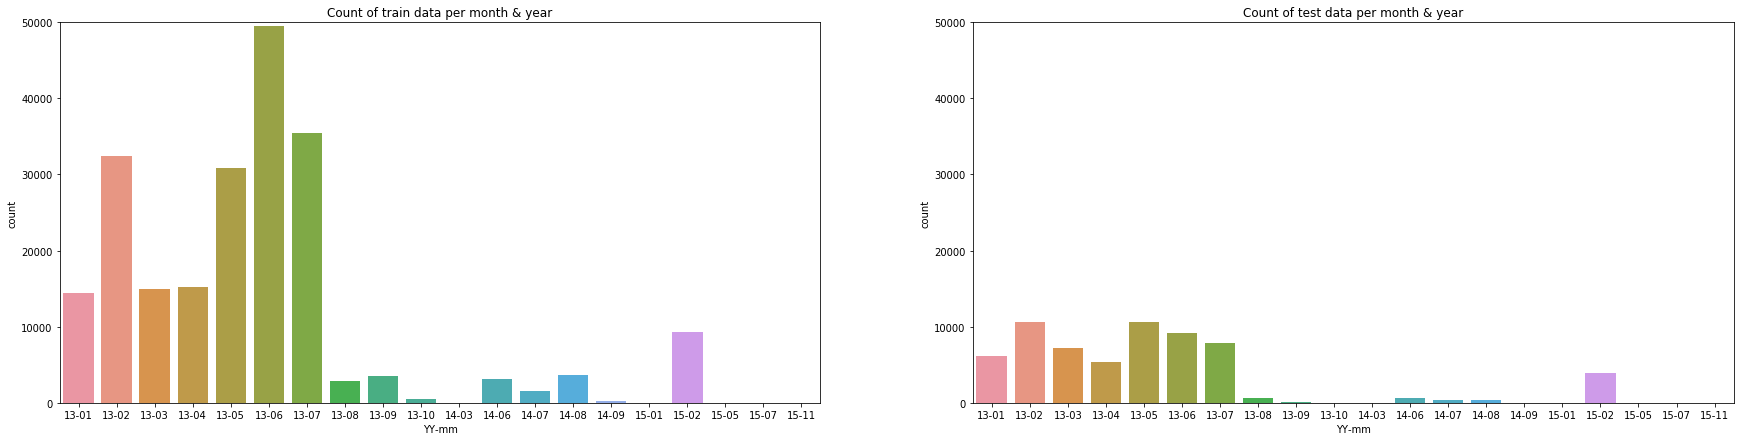

In [26]:
fig, ax = plt.subplots(1,2, figsize=(30,7))
ax = plt.subplot(1,2,1)
ax = plt.title('Count of train data per month & year')
ax = sns.countplot(month_year, order=labels_month_year)
ax.set(xlabel='YY-mm', ylabel='count')
ax.set(ylim=(0,50000))

ax = plt.subplot(1,2,2)
ax = plt.title('Count of test data per month & year')

ax = sns.countplot(month_year_test, order=labels_month_year)
ax.set(xlabel='YY-mm', ylabel='count')
ax.set(ylim=(0,50000))

In [27]:
labels_month = sorted(list(set(df_images['datetime'].map(lambda str: str[5:7]))))

[(0, 55000)]

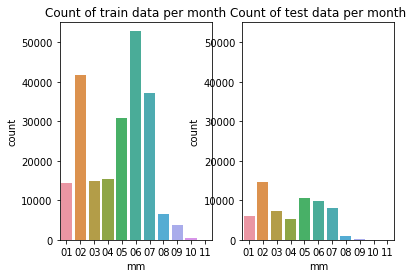

In [28]:
ax = plt.subplot(1,2,1)
plt.title('Count of train data per month')
ax = sns.countplot(df_images['datetime'].map(lambda str: str[5:7] ), order=labels_month)
ax.set(xlabel='mm', ylabel='count')
ax.set(ylim=(0,55000))

ax = plt.subplot(1,2,2)
plt.title('Count of test data per month')
ax = sns.countplot(df_images_test['datetime'].map(lambda str: str[5:7] ), order=labels_month)
ax.set(xlabel='mm', ylabel='count')
ax.set(ylim=(0,55000))

In [29]:
train_taken_hour = df_images['datetime'].map(lambda x: dt.strptime(x, '%Y-%m-%d %H:%M:%S.%f').hour)
test_taken_hour = df_images_test['datetime'].map(lambda x: dt.strptime(x, '%Y-%m-%d %H:%M:%S.%f').hour)

[(0, 20000)]

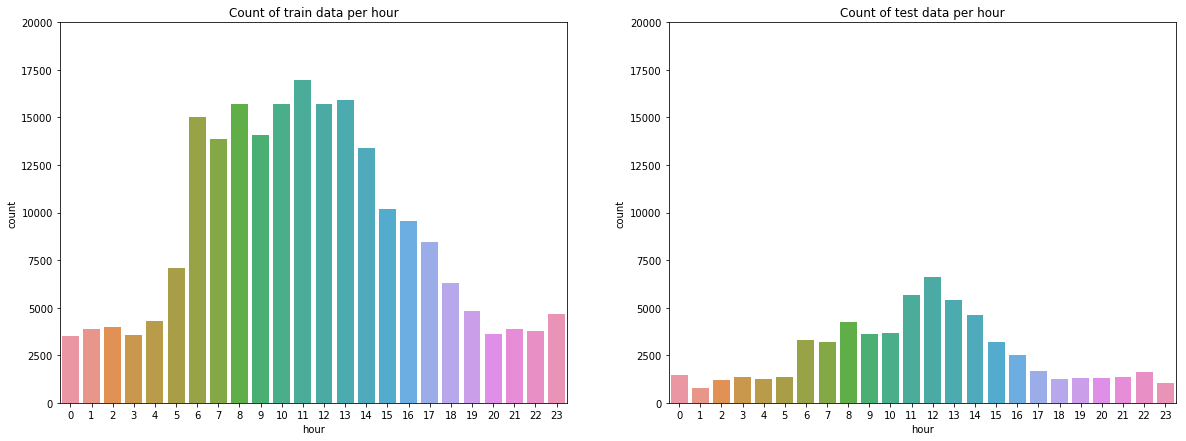

In [30]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
ax = plt.subplot(1,2,1)
plt.title('Count of train data per hour')
ax = sns.countplot(train_taken_hour)
ax.set(xlabel='hour', ylabel='count')
ax.set(ylim=(0,20000))

ax = plt.subplot(1,2,2)
plt.title('Count of test data per hour')
ax = sns.countplot(test_taken_hour)
ax.set(xlabel='hour', ylabel='count')
ax.set(ylim=(0,20000))

In [31]:
train_taken_phase = train_taken_hour.map(lambda x: "daytime" if x >= 6 and x < 18 else "night")
test_taken_phase = test_taken_hour.map(lambda x: "daytime" if x >= 6 and x < 18 else "night")

[(0, 200000)]

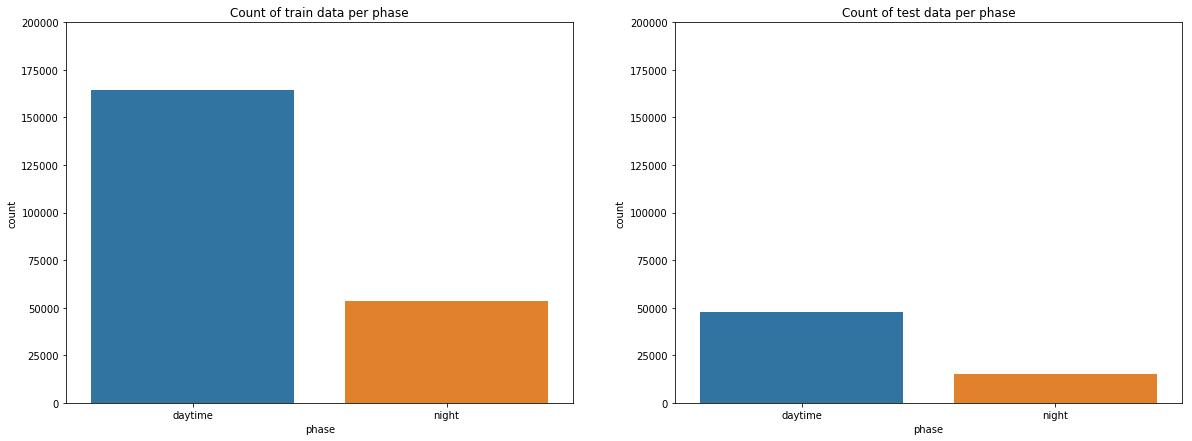

In [32]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
ax = plt.subplot(1,2,1)
plt.title('Count of train data per phase')
ax = sns.countplot(train_taken_phase, order=["daytime", "night"])
ax.set(xlabel='phase', ylabel='count')
ax.set(ylim=(0,200000))

ax = plt.subplot(1,2,2)
plt.title('Count of test data per phase')
ax = sns.countplot(test_taken_phase, order=["daytime", "night"])
ax.set(xlabel='phase', ylabel='count')
ax.set(ylim=(0,200000))

In [33]:
del train_taken_phase
del test_taken_phase
del train_taken_hour
del test_taken_hour
gc.collect()

23027

Text(0.5, 1.0, 'distribution of number of data per id zoomed')

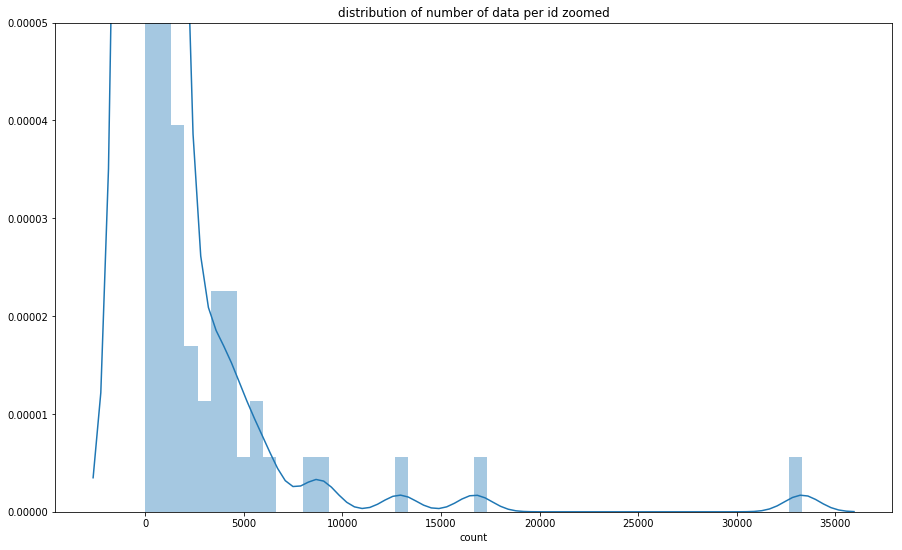

In [34]:
fig = plt.figure(figsize=(15, 9))
ax = sns.distplot(df_categories['count'][1:])
ax.set(ylim=(0,0.00005))
ax.set(xlabel='count')
plt.title('distribution of number of data per id zoomed')

In [35]:
labels_location_train = sorted(list(set(df_images['location'])))
labels_location_test = sorted(list(set(df_images_test['location'])))
labels_location = labels_location_train + labels_location_test

In [36]:
loc_cat_df_test = pd.merge(df_images, df_annotations, left_on='id', right_on='image_id', how = "inner").loc[:,["location", "category_id", "image_id"]]
loc_cat_df_test.head()

,location,category_id,image_id
0,267,73,96b00332-21bc-11ea-a13a-137349068a90
1,264,4,879d74d8-21bc-11ea-a13a-137349068a90
2,45,227,9017f7aa-21bc-11ea-a13a-137349068a90
3,45,250,90d93c58-21bc-11ea-a13a-137349068a90
4,45,2,887cd0ec-21bc-11ea-a13a-137349068a90


In [37]:
loc_cat_dict = {}
for loc in set(loc_cat_df_test["location"]):
    loc_cat_dict[loc] = list(set(loc_cat_df_test[loc_cat_df_test["location"] == loc]["category_id"]))   
loc_cat_matrix = np.zeros([loc_cat_df_test["location"].max()+1, loc_cat_df_test["category_id"].max()+1])
loc_cat_matrix.shape


(552, 572)

In [38]:
for loc in loc_cat_dict.keys():
    for cat in loc_cat_dict[loc]:
        loc_cat_matrix[loc, cat] = 1

Text(0.5, 1.0, 'Relation between animal categories and locations')

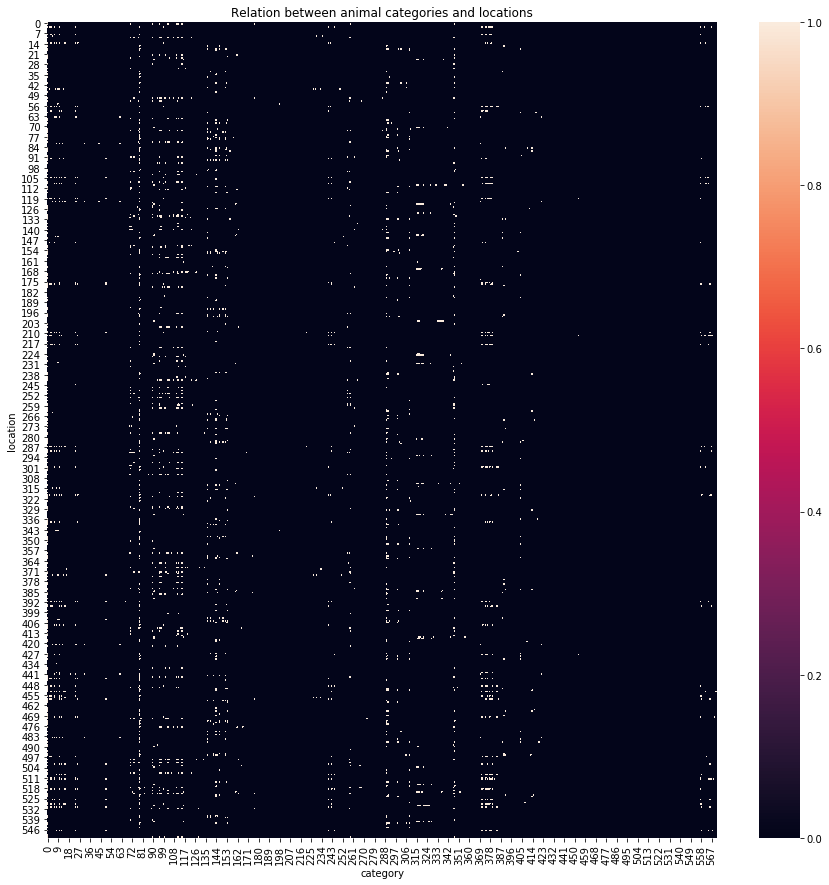

In [39]:
fig = plt.figure(figsize=(15, 15))
ax = sns.heatmap(loc_cat_matrix)
ax.set(xlabel='category', ylabel='location')
plt.title('Relation between animal categories and locations')

In [40]:
df_annotations[2429:2440]

,category_id,count,id,image_id
2429,319,3,9e93e2b2-21bc-11ea-a13a-137349068a90,89c7d924-21bc-11ea-a13a-137349068a90
2430,319,3,9b353a9e-21bc-11ea-a13a-137349068a90,9941e9f8-21bc-11ea-a13a-137349068a90
2431,319,3,a31ea448-21bc-11ea-a13a-137349068a90,97b66c76-21bc-11ea-a13a-137349068a90
2432,319,3,a254e0b8-21bc-11ea-a13a-137349068a90,8a56394e-21bc-11ea-a13a-137349068a90
2433,319,3,9e9a2046-21bc-11ea-a13a-137349068a90,9392522c-21bc-11ea-a13a-137349068a90
2434,319,3,9c0b8806-21bc-11ea-a13a-137349068a90,951109b8-21bc-11ea-a13a-137349068a90
2435,319,3,9b14d3da-21bc-11ea-a13a-137349068a90,8681e7dc-21bc-11ea-a13a-137349068a90
2436,319,3,a08e61b4-21bc-11ea-a13a-137349068a90,90ff1c3e-21bc-11ea-a13a-137349068a90
2437,319,3,9b7e0aee-21bc-11ea-a13a-137349068a90,88a04af4-21bc-11ea-a13a-137349068a90
2438,319,3,a2e88c28-21bc-11ea-a13a-137349068a90,8bb31b9a-21bc-11ea-a13a-137349068a90


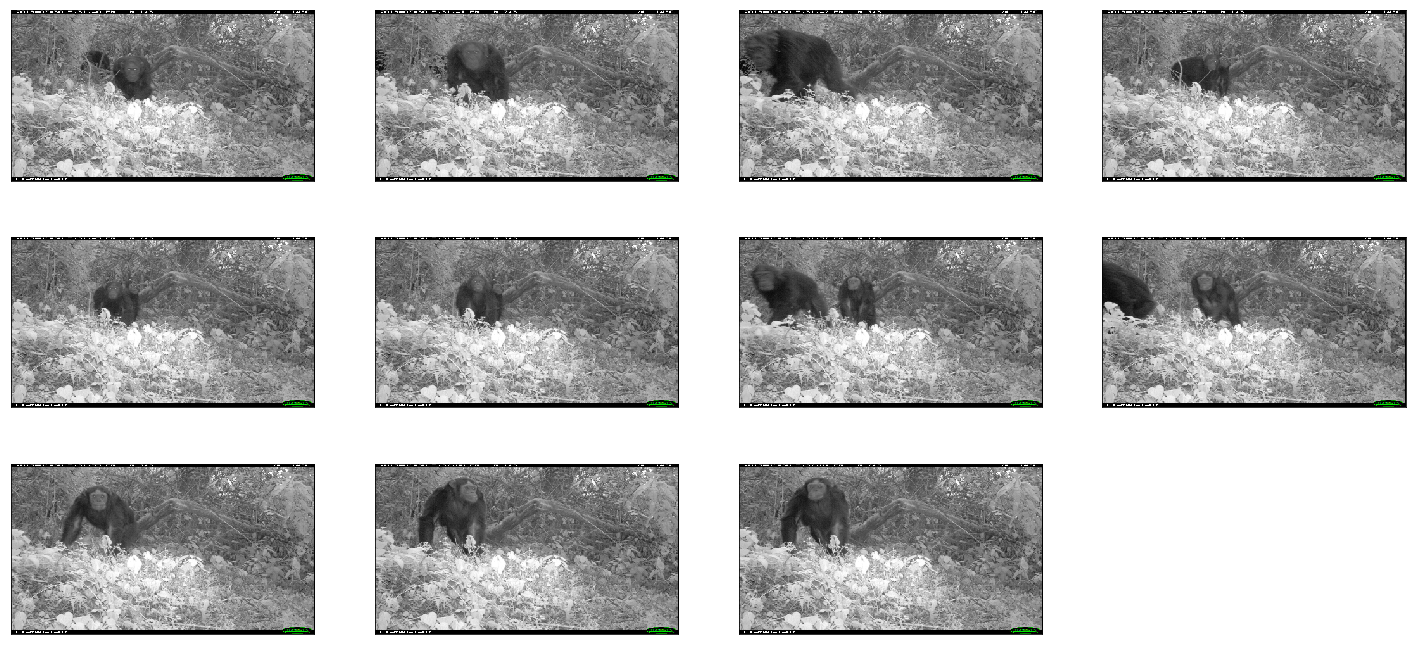

In [41]:
fig = plt.figure(figsize=(25, 16))
#for i,im_path in enumerate(df_annotations[df_annotations.loc[:,"count"] == 3].loc[:,"image_id"][2429:2440]):
for i,im_path in enumerate(df_annotations.loc[:,"image_id"][2429:2440]):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    im = Image.open("/home/ubuntu/train/" + im_path + ".jpg")
    im = im.resize((480,270))
    plt.imshow(im)

In [42]:
c = collections.Counter(df_annotations.loc[:,"count"])
animals_in_pict = list(c.keys())
freq = list(c.values())
k = zip(animals_in_pict,freq)

In [43]:
animals_in_pict_df = pd.DataFrame(sorted(k),columns=['num_of_animals','freq'])

In [44]:
animals_in_pict_df

,num_of_animals,freq
0,-1,8758
1,0,45009
2,1,123032
3,2,16488
4,3,7958
5,4,4803
6,5,3180
7,6,1989
8,7,948
9,8,561


In [45]:
species_morethan_10 = list(set(df_annotations[df_annotations.loc[:,"count"] >= 10].loc[:,"category_id"]))
df_categories[df_categories.loc[:,"id"].isin(species_morethan_10)].loc[:,["id", "name"]]

,id,name
1,2,tayassu pecari
31,70,capra aegagrus
32,71,bos taurus
33,72,ovis aries
38,78,papio anubis
44,90,loxodonta africana
48,96,aepyceros melampus
51,99,equus ferus
79,137,macaca nemestrina
94,163,lycaon pictus


In [46]:
species_morethan_30 = list(set(df_annotations[df_annotations.loc[:,"count"] >= 30].loc[:,"category_id"]))
df_categories[df_categories.loc[:,"id"].isin(species_morethan_30)].loc[:,["id", "name"]]

,id,name
1,2,tayassu pecari
32,71,bos taurus


In [47]:
df_annotations[(df_annotations.loc[:,"category_id"] == 2) & (df_annotations.loc[:,"count"] >= 30)].head()

,category_id,count,id,image_id
149674,2,39,9ba804d4-21bc-11ea-a13a-137349068a90,97f407ac-21bc-11ea-a13a-137349068a90
149675,2,39,a0eb84ac-21bc-11ea-a13a-137349068a90,954d7740-21bc-11ea-a13a-137349068a90
149676,2,39,9b8cb4b8-21bc-11ea-a13a-137349068a90,86b3a4fc-21bc-11ea-a13a-137349068a90
149677,2,39,a3456d62-21bc-11ea-a13a-137349068a90,90a74fea-21bc-11ea-a13a-137349068a90
149678,2,39,a2284a1c-21bc-11ea-a13a-137349068a90,88f81d24-21bc-11ea-a13a-137349068a90


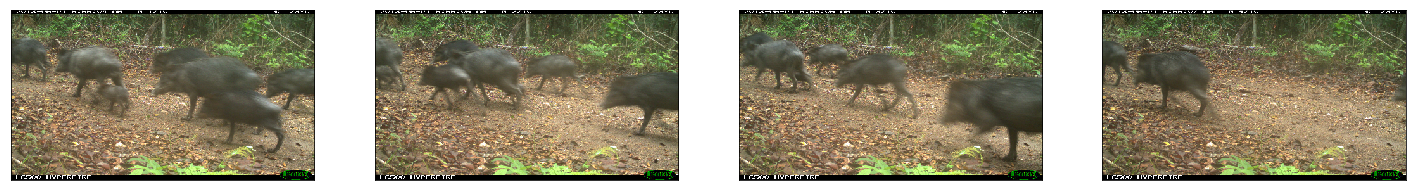

In [48]:
fig = plt.figure(figsize=(25, 16))
#for i,im_path in enumerate(df_annotations[df_annotations.loc[:,"count"] == 3].loc[:,"image_id"][2429:2440]):
for i,im_path in enumerate(df_annotations.loc[:,"image_id"][149674:149678]):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    im = Image.open("/home/ubuntu/train/" + im_path + ".jpg")
    im = im.resize((480,270))
    plt.imshow(im)

In [49]:
df_annotations[(df_annotations.loc[:,"category_id"] == 71) & (df_annotations.loc[:,"count"] >= 30)].head()

,category_id,count,id,image_id
7822,71,75,9babb6ec-21bc-11ea-a13a-137349068a90,8a28c004-21bc-11ea-a13a-137349068a90
7823,71,75,9cb5fa16-21bc-11ea-a13a-137349068a90,97062316-21bc-11ea-a13a-137349068a90
7824,71,75,9af4c6a8-21bc-11ea-a13a-137349068a90,89eab214-21bc-11ea-a13a-137349068a90
22828,71,33,9ddf98ca-21bc-11ea-a13a-137349068a90,8971a392-21bc-11ea-a13a-137349068a90
22829,71,33,9ebcdd66-21bc-11ea-a13a-137349068a90,95e2d5c4-21bc-11ea-a13a-137349068a90


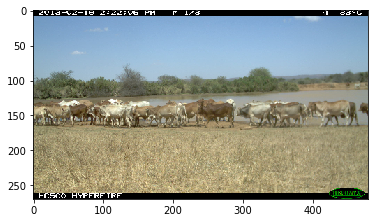

In [50]:
jpeg ='/home/ubuntu/train/8897a9f8-21bc-11ea-a13a-137349068a90.jpg'
im = Image.open(jpeg)
im = im.resize((480,270))
plt.imshow(im)

In [54]:
!pip install tensorflow-gpu==1.14.0
!pip install keras==2.2.4
!pip install git+https://github.com/qubvel/efficientnet
!ip install -U segmentation-models

import cv2
from copy import deepcopy
import efficientnet.keras as efn 
import glob
from IPython.display import Image
import json
import keras
from keras import backend as K
import keras
#import keras.backend as K
from keras.optimizers import Adam
from keras.applications.densenet import DenseNet201
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, applications
from keras.models import Model, load_model
from keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.utils import Sequence
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
from numpy.random import seed
import os
import random
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm

seed(10)

%matplotlib inline

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-_6hf7m6x
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-_6hf7m6x
  Created wheel for efficientnet: filename=efficientnet-1.1.0-py3-none-any.whl size=18326 sha256=a5a8361cd6a5dcbc6889e91c9689c8492bc24a000bcf4e3440296d6e9e1f3d7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-cjo8z4g2/wheels/11/69/85/814d64d694c96db0eef17b718042d644a1e54f113920481920
Successfully built efficientnet
Object "install" is unknown, try "ip help".


ModuleNotFoundError: No module named 'efficientnet'

In [ ]:
train_anns_df = df_annotations[['image_id','category_id']]
train_img_df = df_images[['id', 'file_name']].rename(columns={'id':'image_id'})
df_train_file_cat = pd.merge(train_img_df, train_anns_df, on='image_id')
df_train_file_cat['category_id']=df_train_file_cat['category_id'].astype(str)
df_train_file_cat.head()


In [ ]:
df_train_file_cat = pd.merge(megadetector_results_df, df_train_file_cat, on='image_id', how='inner')

fig = plt.figure(figsize=(15, 4))
ax = sns.countplot(x="detected_num", data=megadetector_results_df)
ax.set(ylabel='count')
#ax.set(ylim=(0,80000))
plt.title('distribution of count per animals each data of train')

In [ ]:
batch_size = 128 #changed from 256
img_size = 96
lr = 0.0005 #changed from 0.0008
nb_classes = 267
nb_epochs = 25 #changed from 6, then 15

In [ ]:
checkpoint_filepath = "/home/ubuntu/epoch_checkpoint"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=False)

In [ ]:
%%time

train_datagen=ImageDataGenerator(rescale=1./255, 
    validation_split=0.25,
    horizontal_flip = True,    
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3
    )

train_generator=train_datagen.flow_from_dataframe(    
    dataframe=df_train_file_cat[:50000],    
    directory="/home/ubuntu/train",
    x_col="file_name",
    y_col="category_id",
    batch_size=batch_size,
    shuffle=True,
    classes = [ str(i) for i in range(nb_classes)],
    class_mode="categorical",    
    target_size=(img_size,img_size))

test_datagen = ImageDataGenerator(rescale=1./255)

valid_generator=test_datagen.flow_from_dataframe(    
    dataframe=df_train_file_cat[50000:],    
    directory="/home/ubuntu/train",
    x_col="file_name",
    y_col="category_id",
    batch_size=batch_size,
    shuffle=True,
    classes = [ str(i) for i in range(nb_classes)],
    class_mode="categorical",  
    target_size=(img_size,img_size))

In [ ]:
from keras import backend as K
import efficientnet.keras as efn 

def get_model():
    K.clear_session()
    base_model =  efn.EfficientNetB3(weights='imagenet', include_top=False, pooling='avg', input_shape=(img_size, img_size, 3))
    x = base_model.output
    predictions = Dense(nb_classes, activation="softmax")(x)
    return Model(inputs=base_model.input, outputs=predictions)

model = get_model()
model.compile(optimizers.Adam(lr=lr, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

In [ ]:
%%time
history = model.fit_generator(generator=train_generator,  
                                    steps_per_epoch=5,
                                    validation_data=valid_generator, 
                                    validation_steps=2,
                                    epochs=nb_epochs,
                                    callbacks = [early], #model_checkpoint_callback
                                    verbose=2)

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['acc', 'val_acc']].plot()

In [ ]:
import gc
del train_datagen, train_generator
gc.collect()

In [ ]:
sam_sub_df = pd.read_csv('/home/ubuntu/sample_submission.csv')
sam_sub_df["file_name"] = sam_sub_df["Id"].map(lambda str : str + ".jpg")
sam_sub_df.head()


In [ ]:
%%time

test_generator = test_datagen.flow_from_dataframe(      
    
        dataframe=sam_sub_df,    
    
        directory = "/home/ubuntu/test",    
        x_col="file_name",
        target_size = (img_size,img_size),
        batch_size = 1,
        classes = [ str(i) for i in range(nb_classes)],
        shuffle = False,
        class_mode = None
        )

In [ ]:
%%time
test_generator.reset()
predict=model.predict_generator(test_generator, steps = len(test_generator.filenames))
predicted_class_indices=np.argmax(predict,axis=1)
sam_sub_df["Category"] = predicted_class_indices
sam_sub_df = sam_sub_df.loc[:,["Id", "Category"]]
sam_sub_df.to_csv("submission_2.csv",index=False)